<a href="https://colab.research.google.com/github/Muhammad-Ahmad-Faizan/CodSoft-Internship-Repository/blob/main/Supervised(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import tensorflow as tf

#DataSets


In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data", names=cols)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df["class"].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

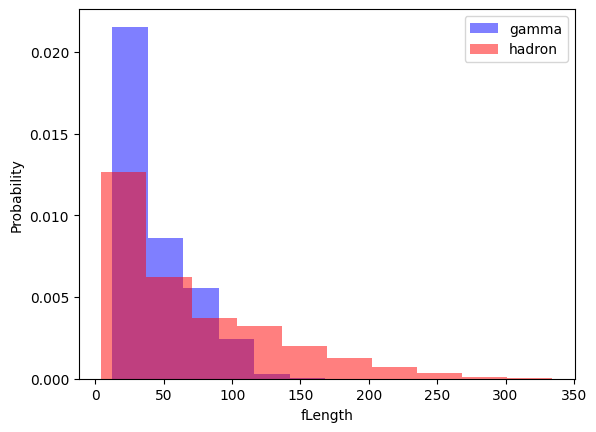

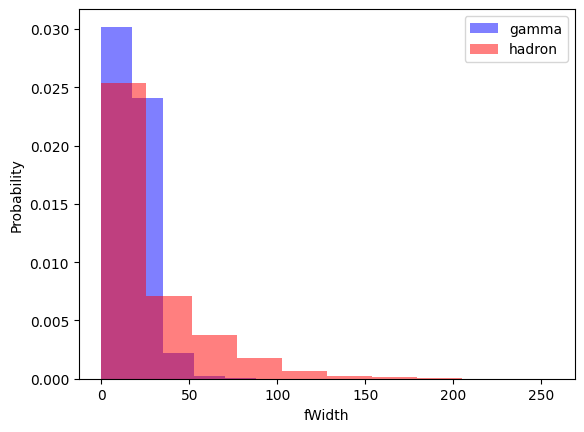

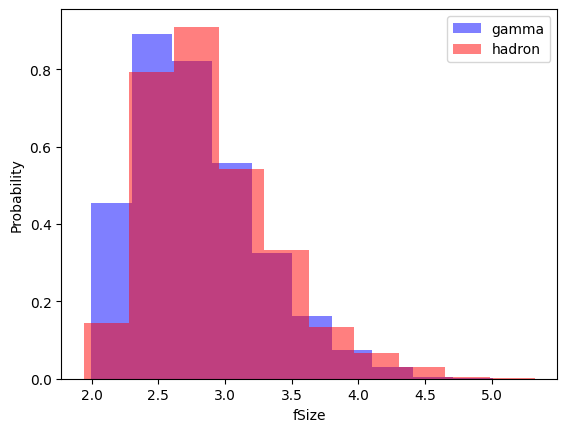

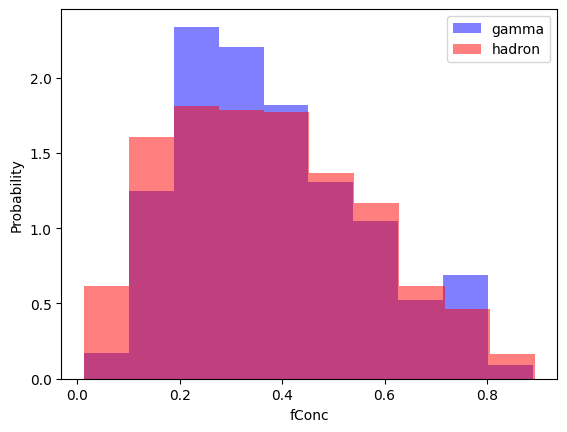

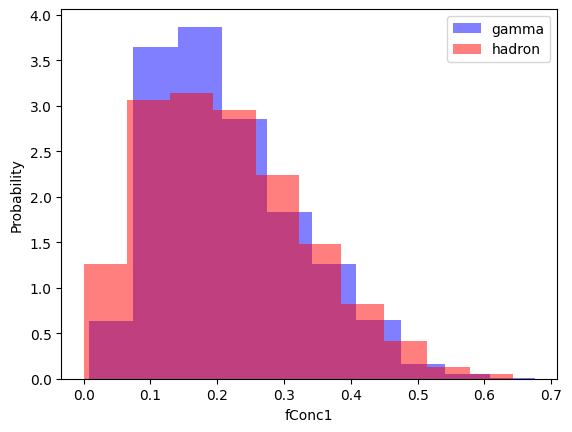

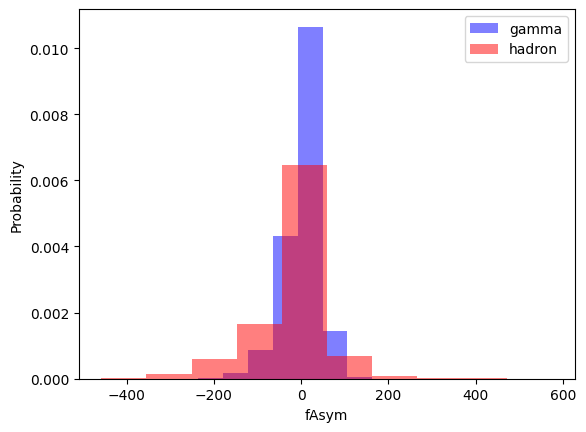

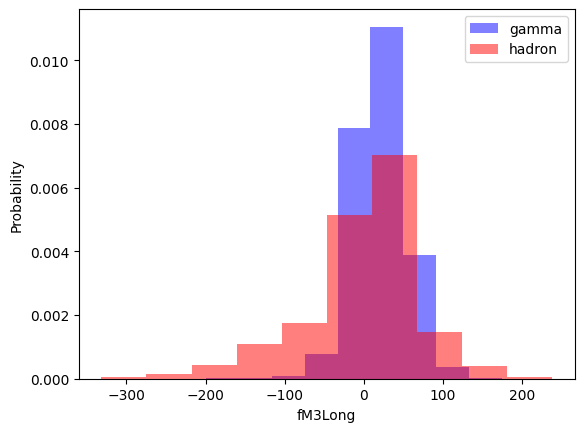

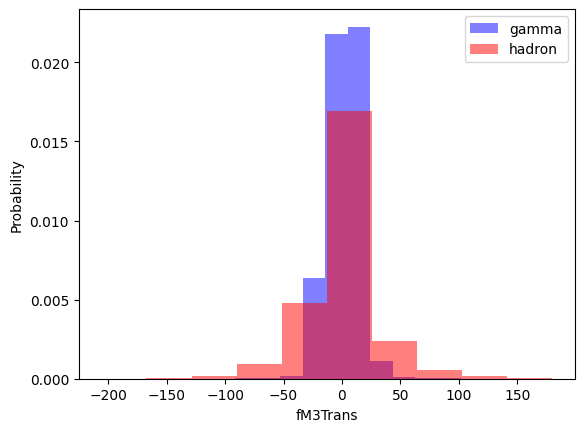

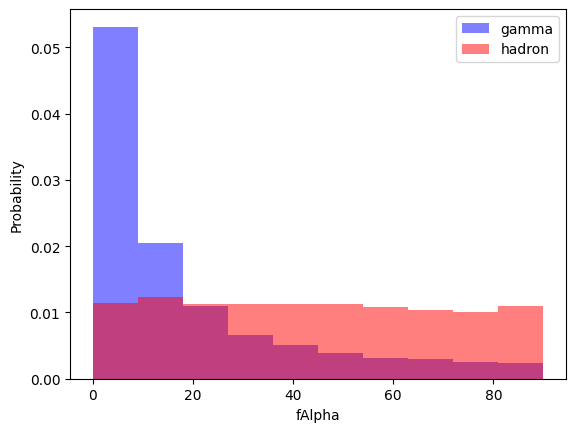

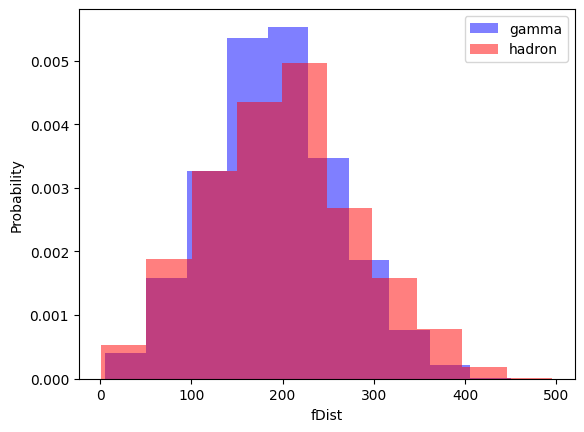

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.5, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.5, density=True)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

# Train, Validation and Test Datasets

In [ ]:
train, valid, test= np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

# KNN(K-Nearest Neighbor)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1367
           1       0.85      0.85      0.85      2437

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



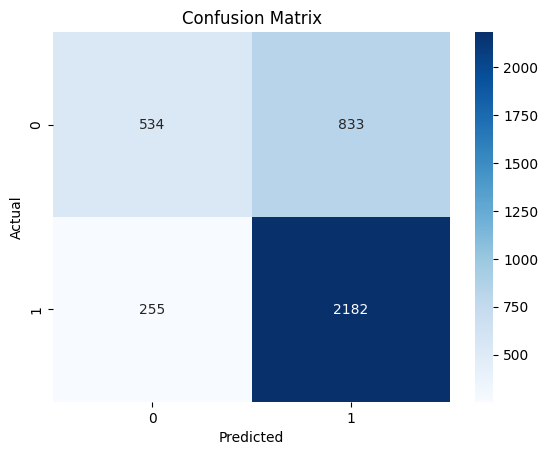

In [ ]:
# Assuming y_true are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Naive Bayes

In [ ]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1367
           1       0.72      0.90      0.80      2437

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Logistic Regression

In [ ]:
lg_model= LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1367
           1       0.84      0.82      0.83      2437

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



# SVM(Support Vector Machines)

In [ ]:
svm_model=SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1367
           1       0.89      0.89      0.89      2437

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary crossentropy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])

  history = nn_model.fit(
      X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
      )

  return nn_model, history

16 nodes, dropuout 0, lr 0.01, batch size 32


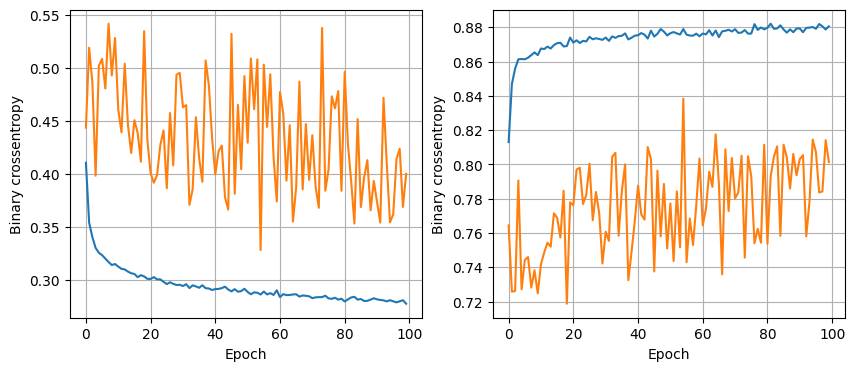

119/119 [==============================] - 1s 5ms/step - loss: 0.3198 - accuracy: 0.8780
16 nodes, dropuout 0, lr 0.01, batch size 64


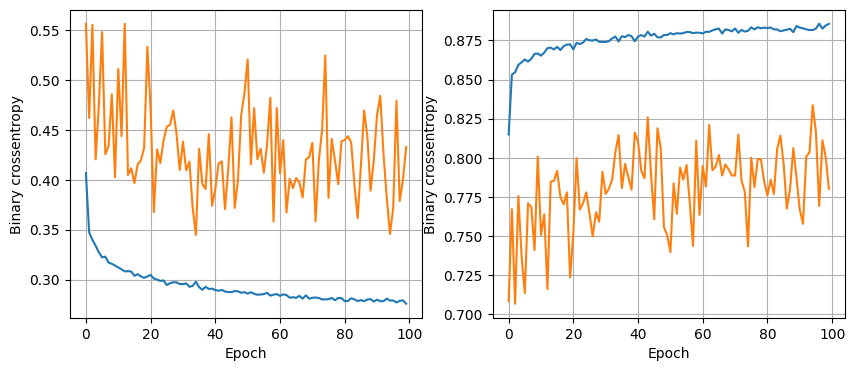

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8762
16 nodes, dropuout 0, lr 0.01, batch size 128


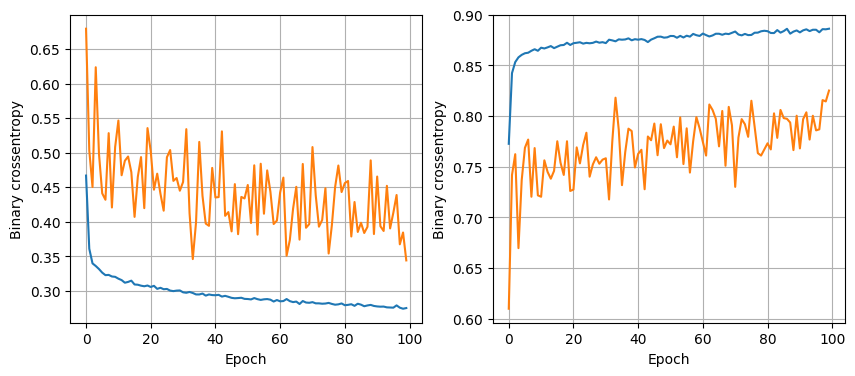

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8709
16 nodes, dropuout 0, lr 0.005, batch size 32


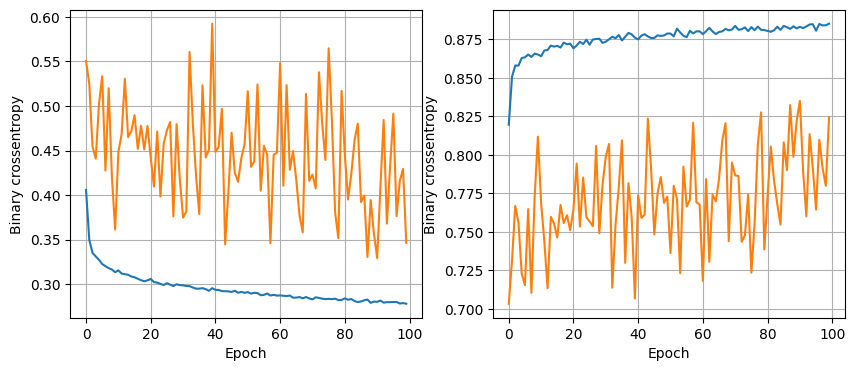

119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8641
16 nodes, dropuout 0, lr 0.005, batch size 64


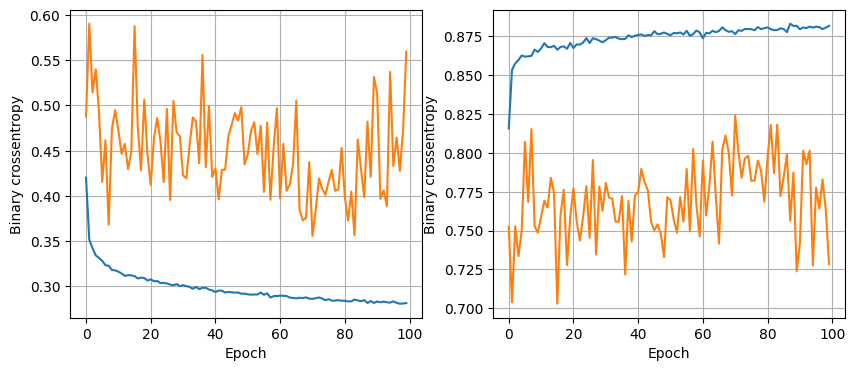

119/119 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8770
16 nodes, dropuout 0, lr 0.005, batch size 128


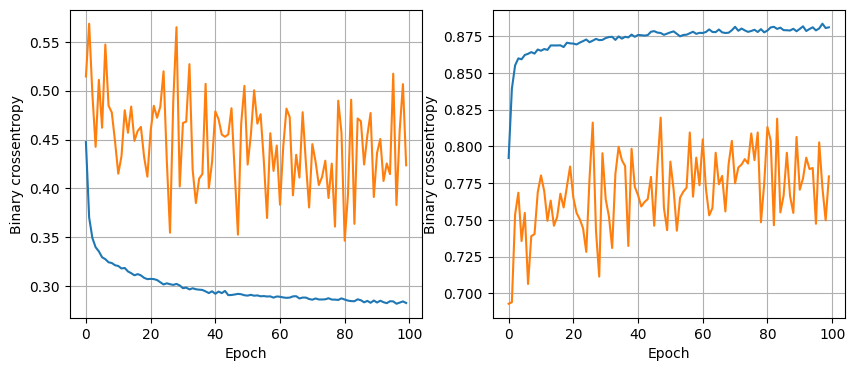

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8751
16 nodes, dropuout 0, lr 0.001, batch size 32


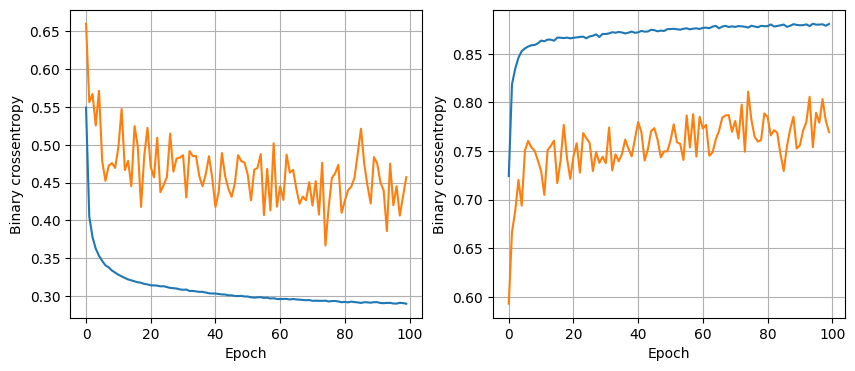

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8728
16 nodes, dropuout 0, lr 0.001, batch size 64


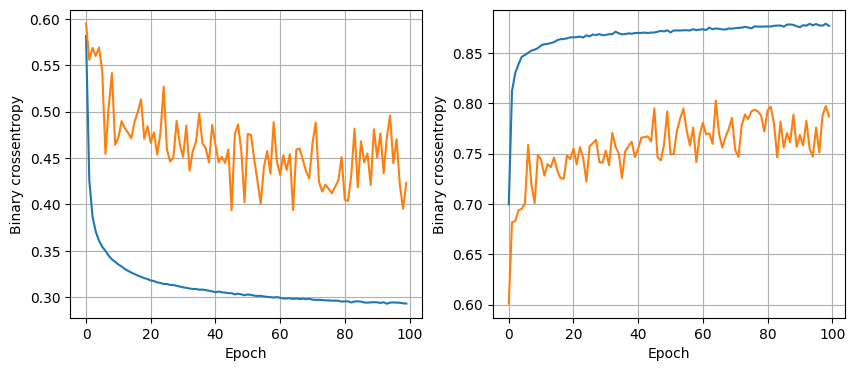

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8749
16 nodes, dropuout 0, lr 0.001, batch size 128


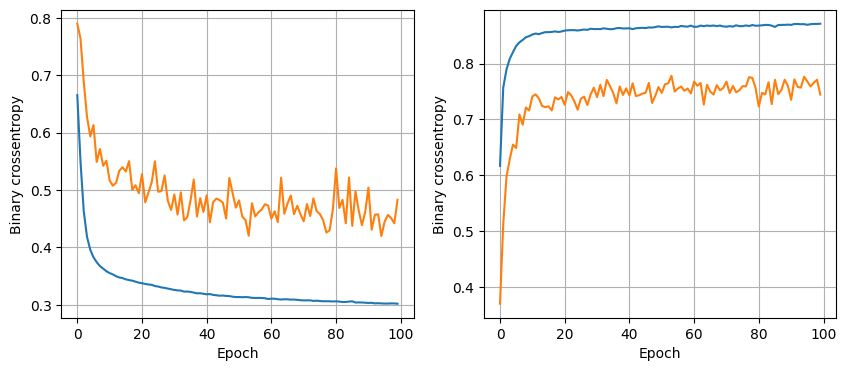

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8722
16 nodes, dropuout 0.2, lr 0.01, batch size 32


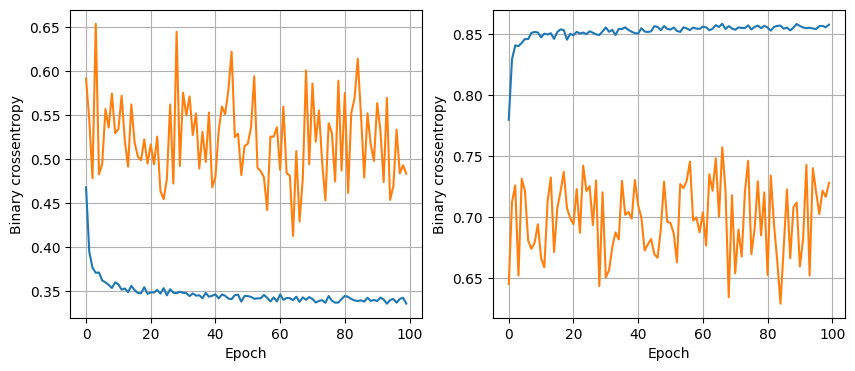

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8709
16 nodes, dropuout 0.2, lr 0.01, batch size 64


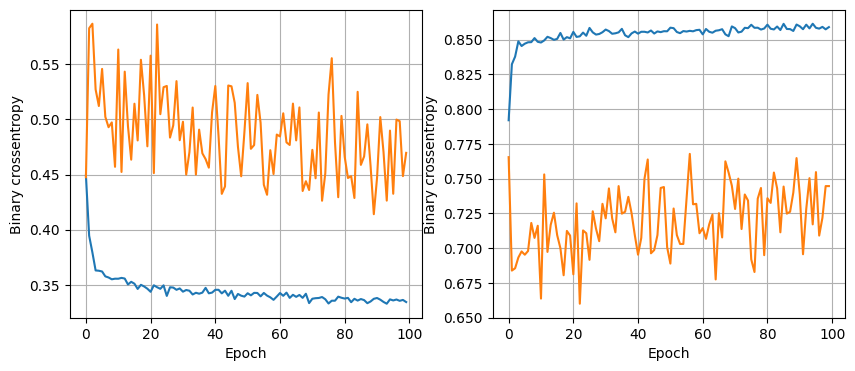

119/119 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8796
16 nodes, dropuout 0.2, lr 0.01, batch size 128


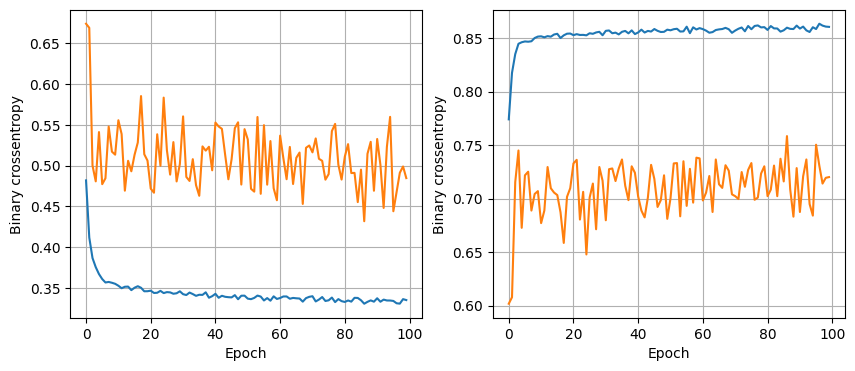

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8749
16 nodes, dropuout 0.2, lr 0.005, batch size 32


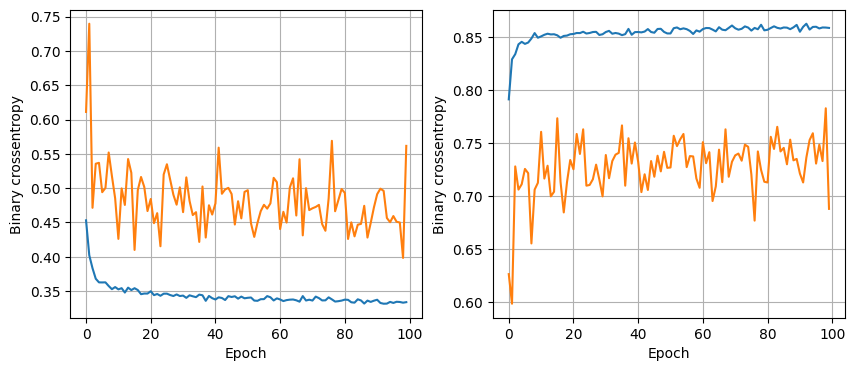

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8712
16 nodes, dropuout 0.2, lr 0.005, batch size 64


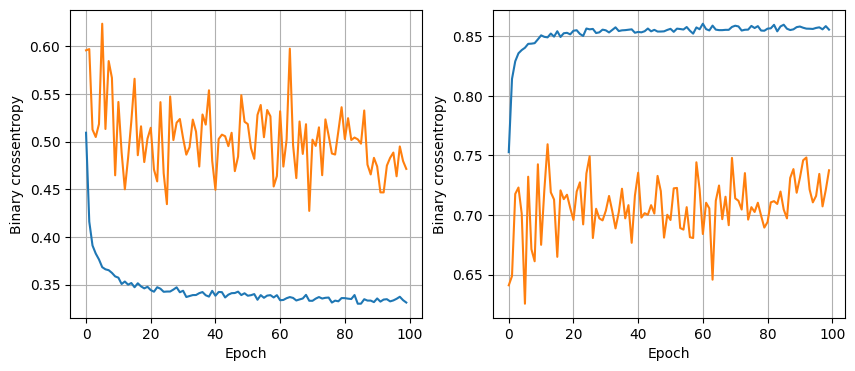

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8783
16 nodes, dropuout 0.2, lr 0.005, batch size 128


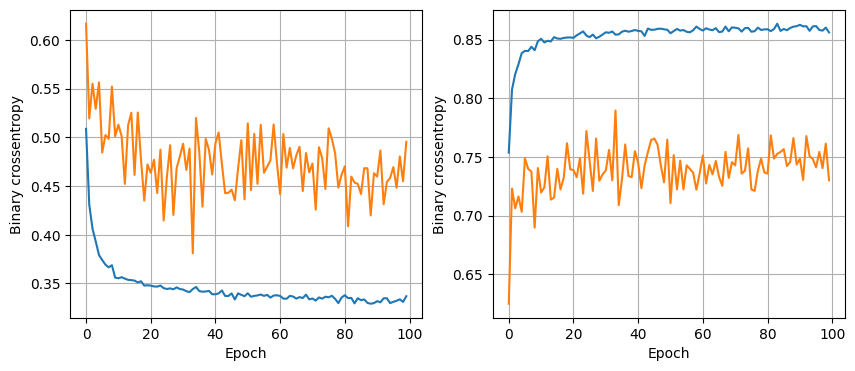

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8736
16 nodes, dropuout 0.2, lr 0.001, batch size 32


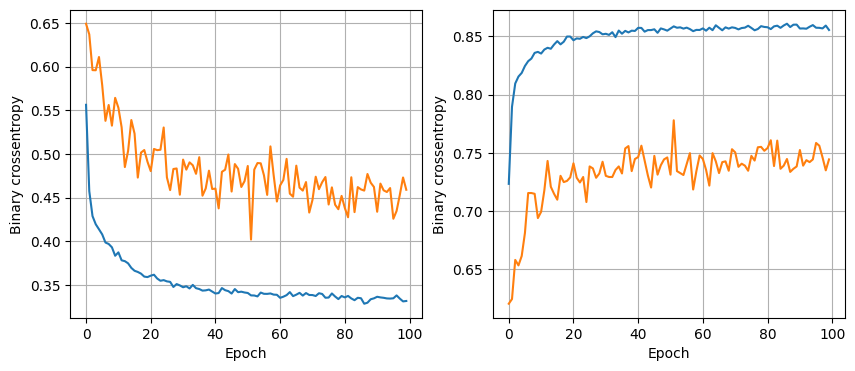

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8804
16 nodes, dropuout 0.2, lr 0.001, batch size 64


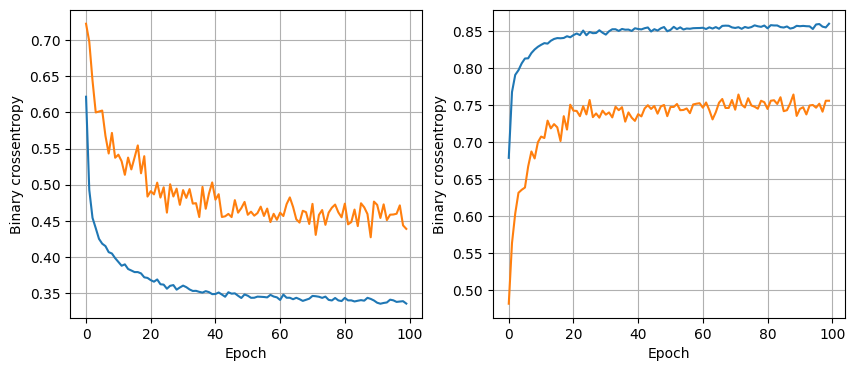

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8712
16 nodes, dropuout 0.2, lr 0.001, batch size 128


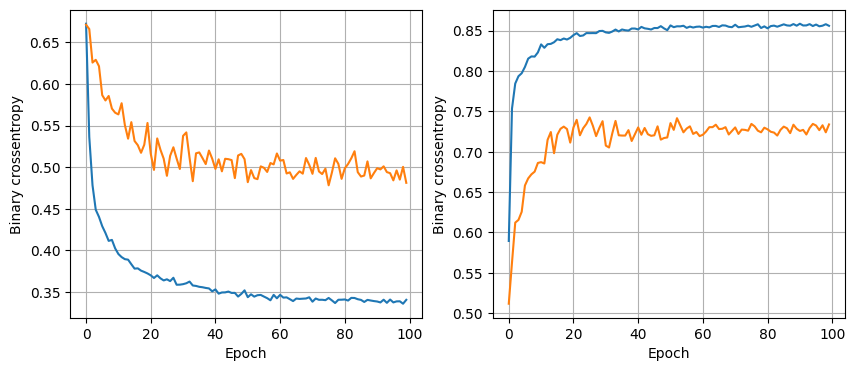

119/119 [==============================] - 1s 5ms/step - loss: 0.3158 - accuracy: 0.8720
32 nodes, dropuout 0, lr 0.01, batch size 32


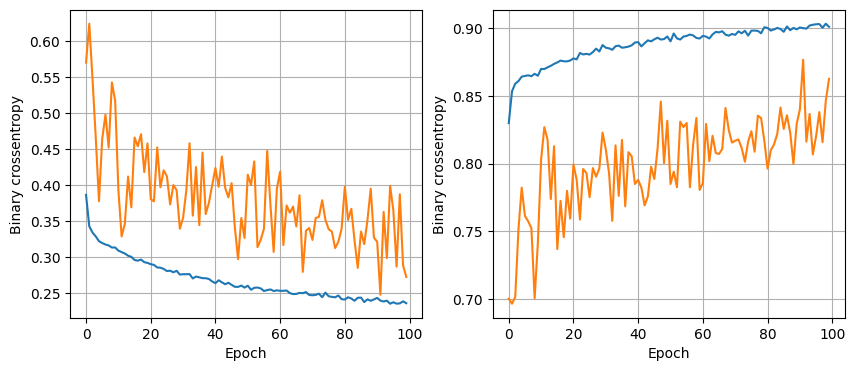

119/119 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8696
32 nodes, dropuout 0, lr 0.01, batch size 64


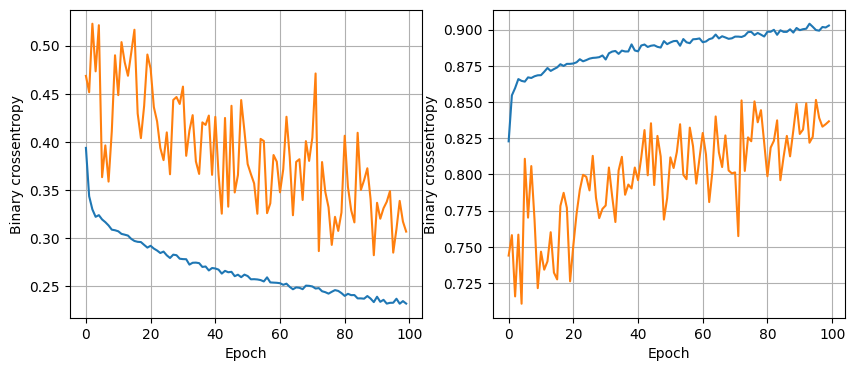

119/119 [==============================] - 1s 4ms/step - loss: 0.3625 - accuracy: 0.8730
32 nodes, dropuout 0, lr 0.01, batch size 128


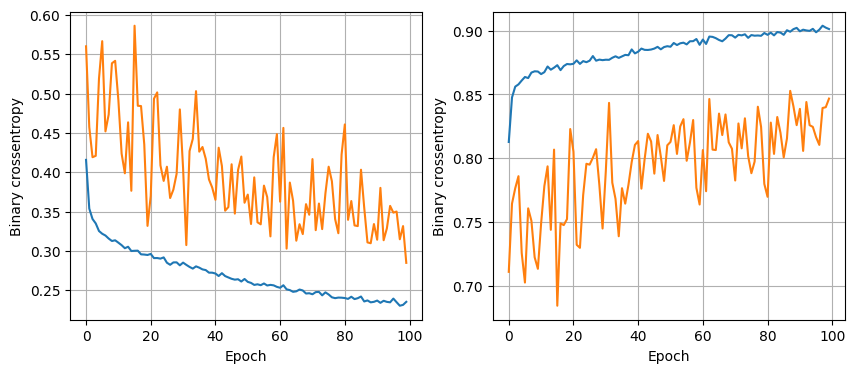

119/119 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8633
32 nodes, dropuout 0, lr 0.005, batch size 32


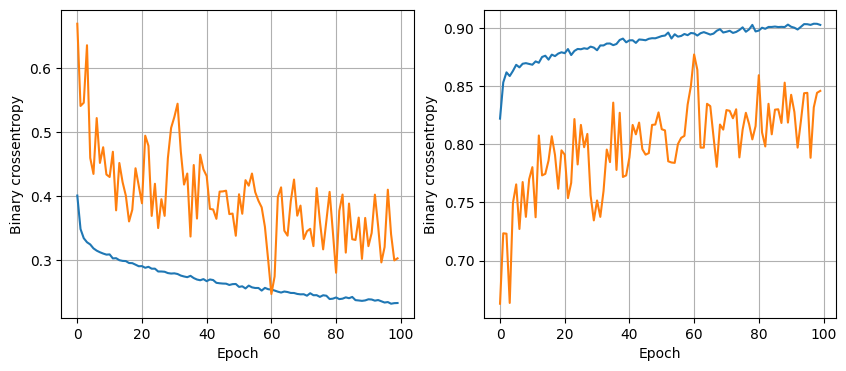

119/119 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.8662
32 nodes, dropuout 0, lr 0.005, batch size 64


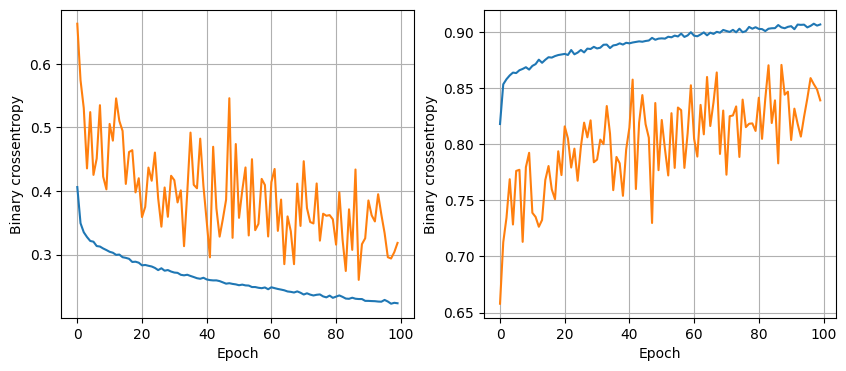

119/119 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8675
32 nodes, dropuout 0, lr 0.005, batch size 128


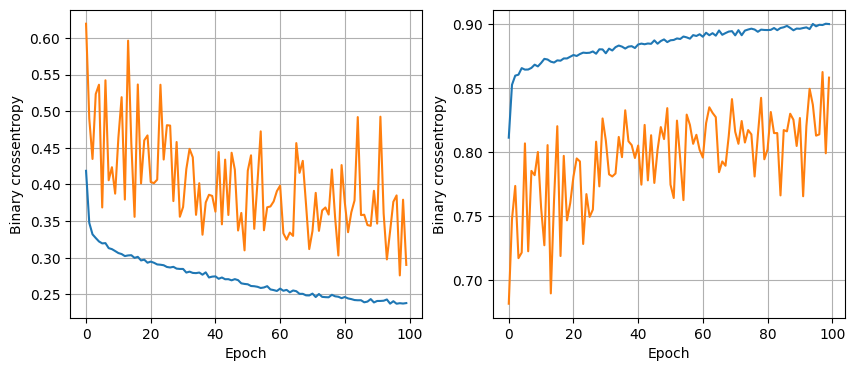

119/119 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8646
32 nodes, dropuout 0, lr 0.001, batch size 32


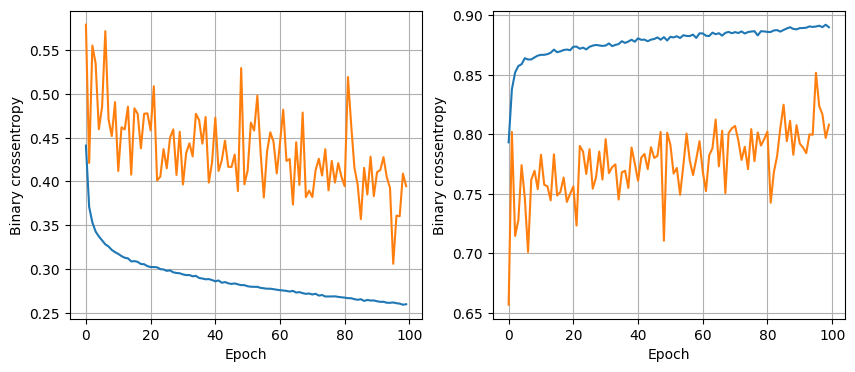

119/119 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8780
32 nodes, dropuout 0, lr 0.001, batch size 64


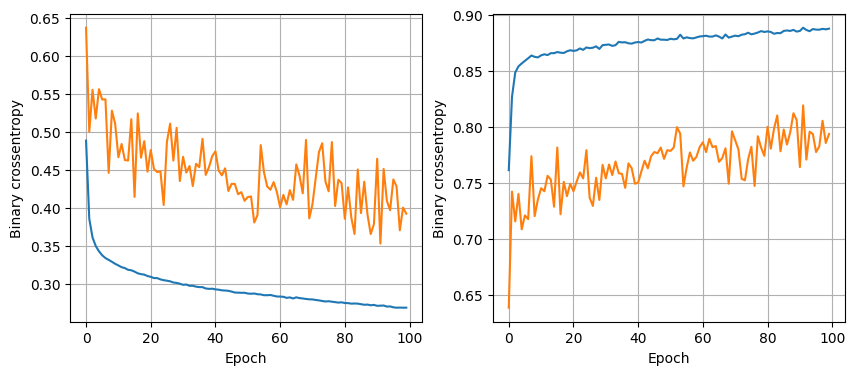

119/119 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8741
32 nodes, dropuout 0, lr 0.001, batch size 128


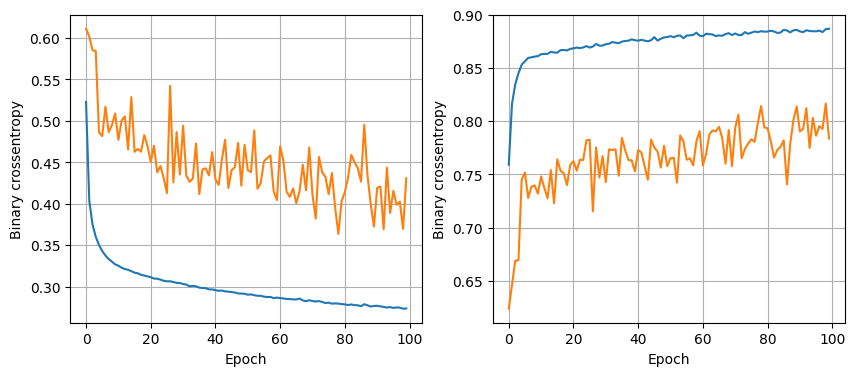

119/119 [==============================] - 1s 6ms/step - loss: 0.3042 - accuracy: 0.8767
32 nodes, dropuout 0.2, lr 0.01, batch size 32


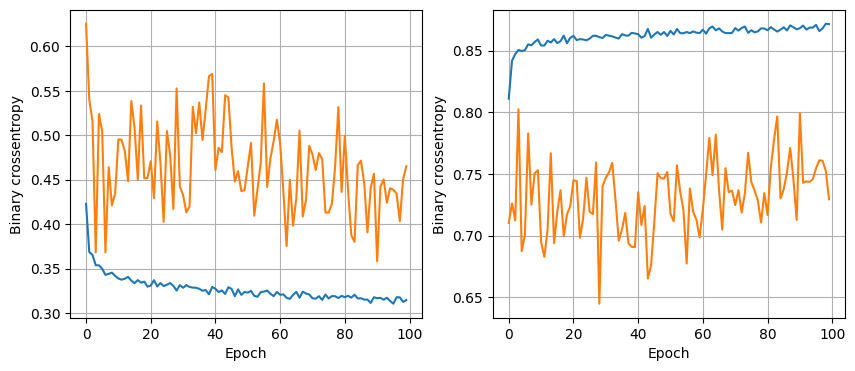

119/119 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.8783
32 nodes, dropuout 0.2, lr 0.01, batch size 64


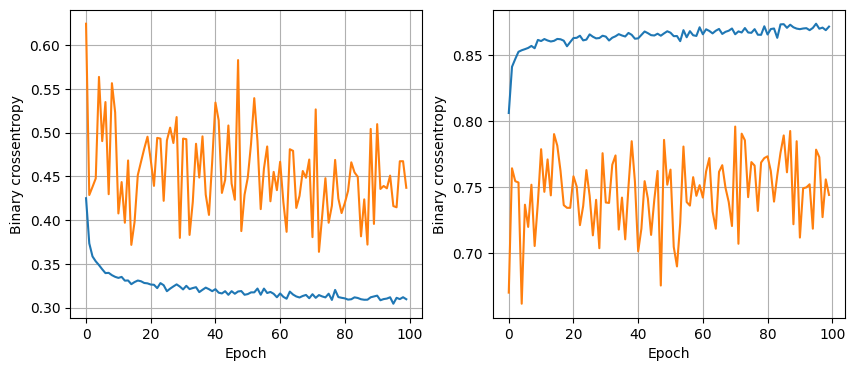

119/119 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8751
32 nodes, dropuout 0.2, lr 0.01, batch size 128


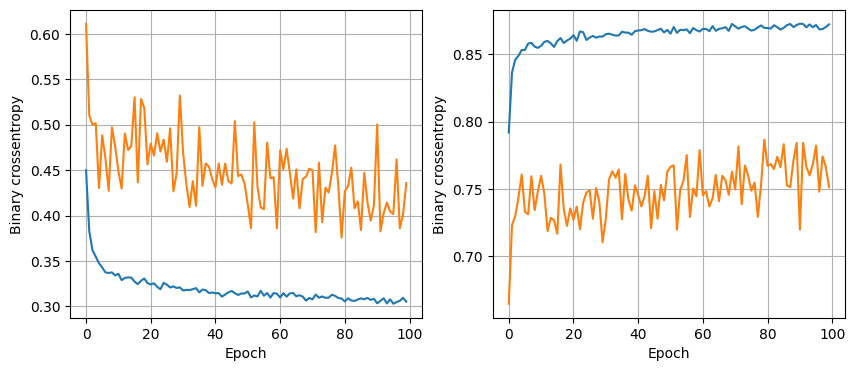

119/119 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8804
32 nodes, dropuout 0.2, lr 0.005, batch size 32


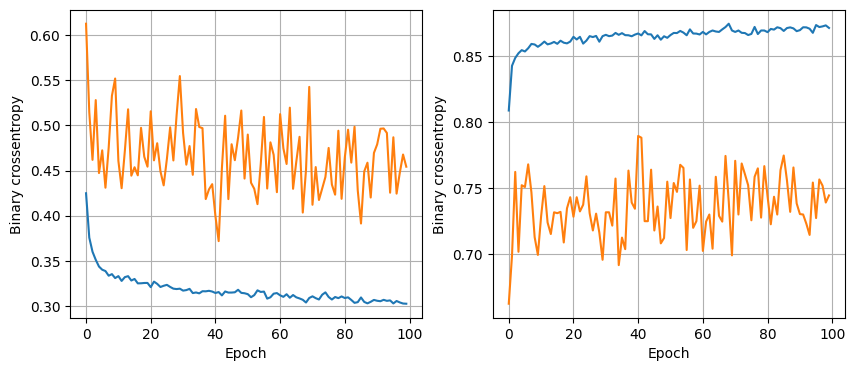

119/119 [==============================] - 1s 4ms/step - loss: 0.2978 - accuracy: 0.8820
32 nodes, dropuout 0.2, lr 0.005, batch size 64


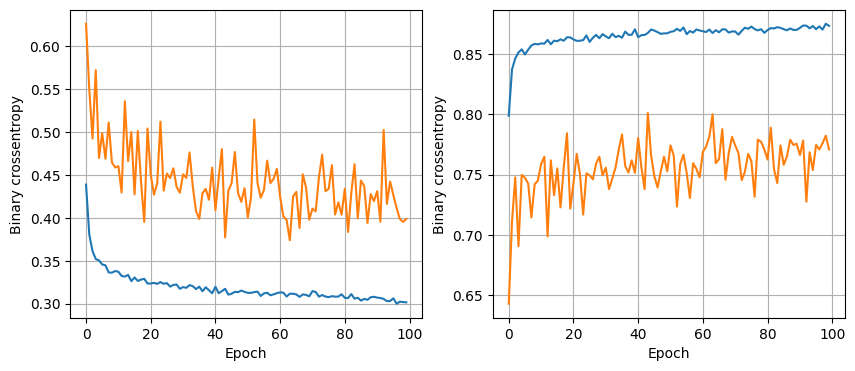

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8801
32 nodes, dropuout 0.2, lr 0.005, batch size 128


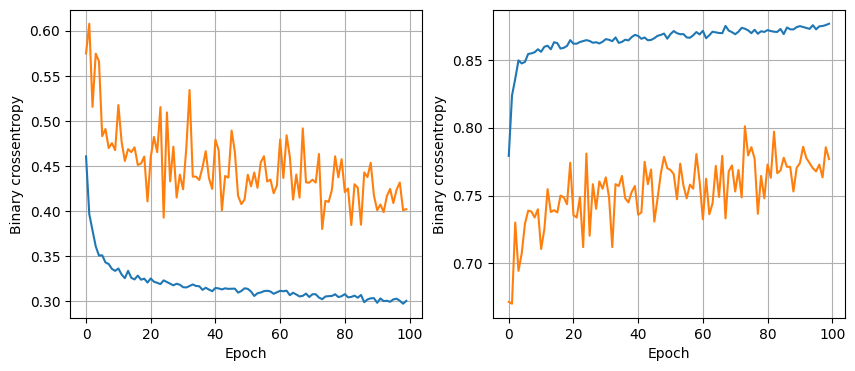

119/119 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8820
32 nodes, dropuout 0.2, lr 0.001, batch size 32


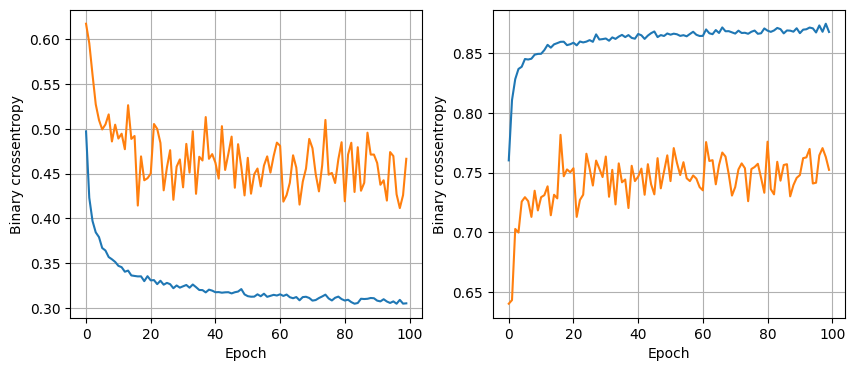

119/119 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8820
32 nodes, dropuout 0.2, lr 0.001, batch size 64


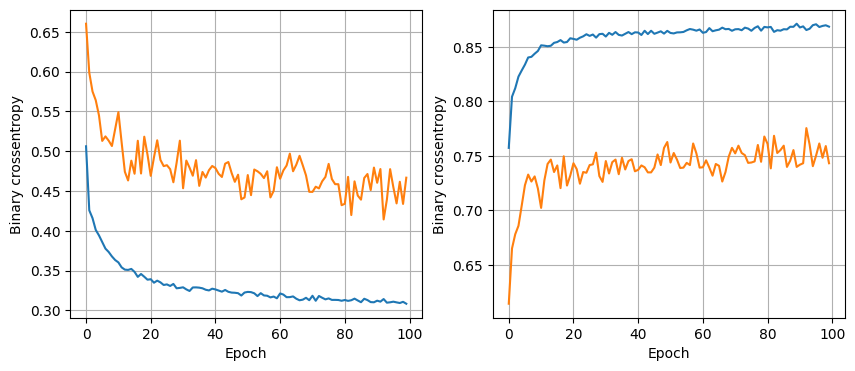

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8785
32 nodes, dropuout 0.2, lr 0.001, batch size 128


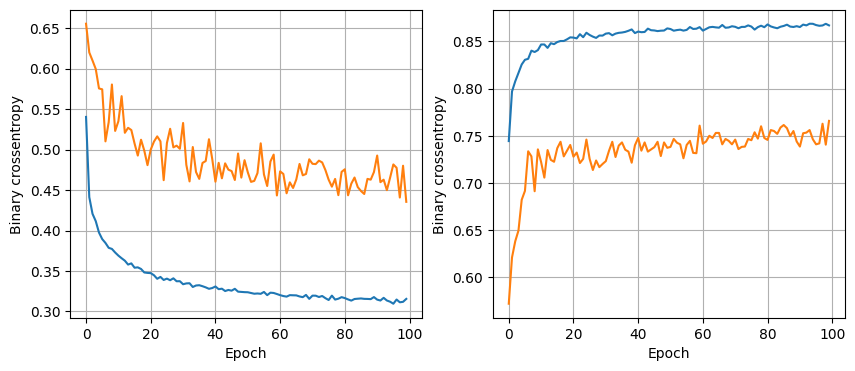

119/119 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.8738
64 nodes, dropuout 0, lr 0.01, batch size 32


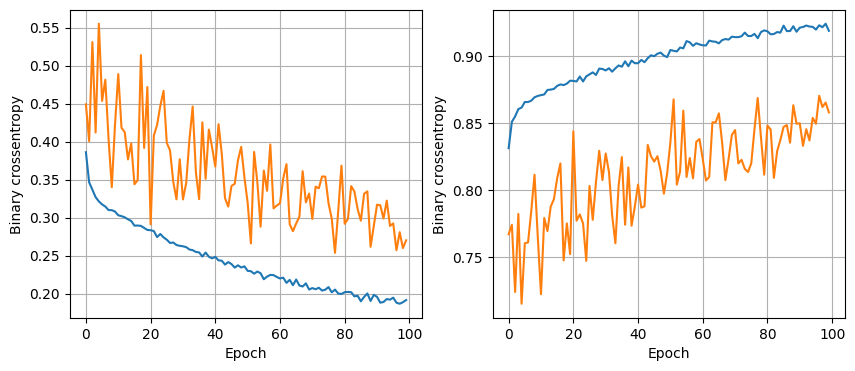

119/119 [==============================] - 1s 3ms/step - loss: 0.5010 - accuracy: 0.8646
64 nodes, dropuout 0, lr 0.01, batch size 64


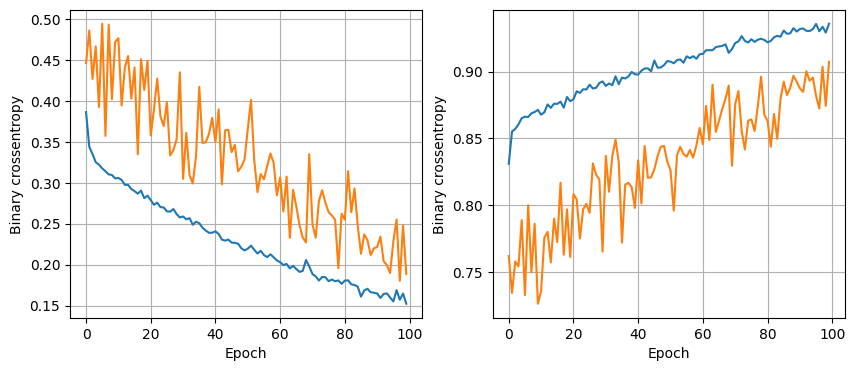

119/119 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.8565
64 nodes, dropuout 0, lr 0.01, batch size 128


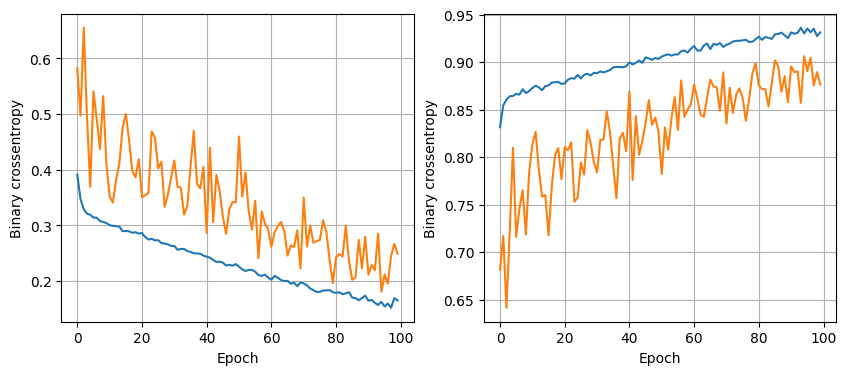

119/119 [==============================] - 1s 5ms/step - loss: 0.5652 - accuracy: 0.8644
64 nodes, dropuout 0, lr 0.005, batch size 32


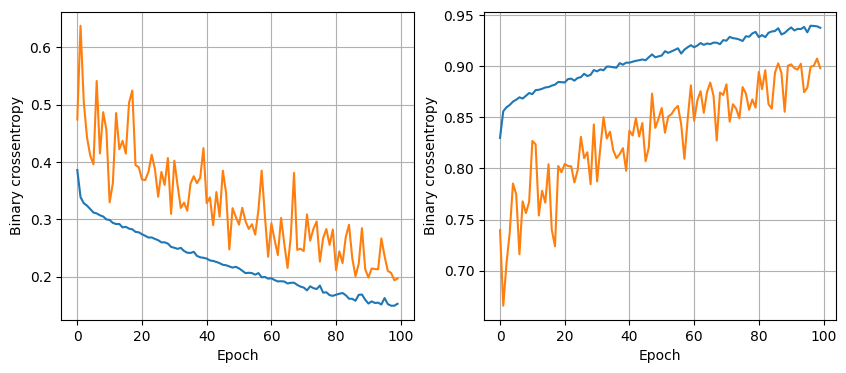

119/119 [==============================] - 1s 5ms/step - loss: 0.5482 - accuracy: 0.8586
64 nodes, dropuout 0, lr 0.005, batch size 64


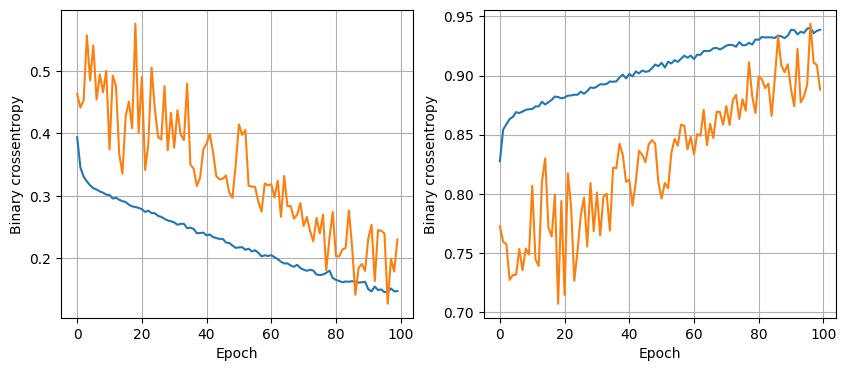

119/119 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.8641
64 nodes, dropuout 0, lr 0.005, batch size 128


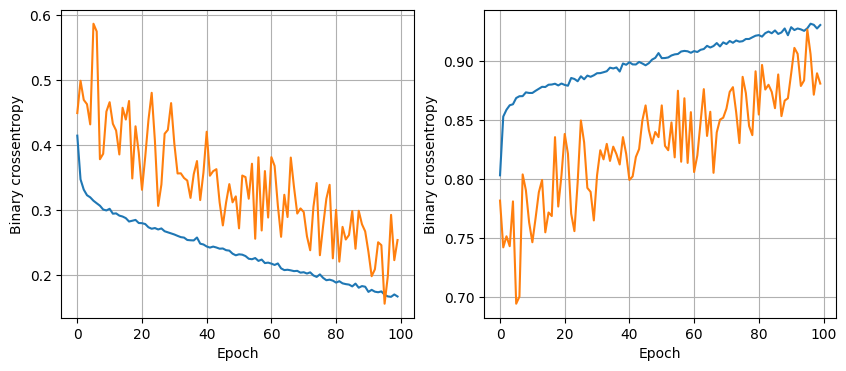

119/119 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.8604
64 nodes, dropuout 0, lr 0.001, batch size 32


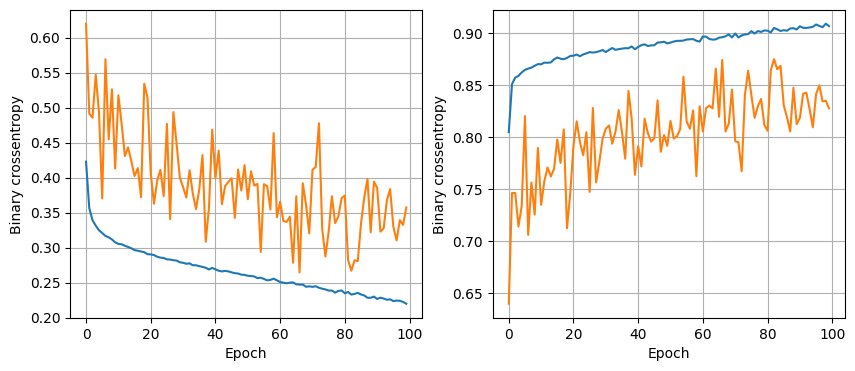

119/119 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8762
64 nodes, dropuout 0, lr 0.001, batch size 64


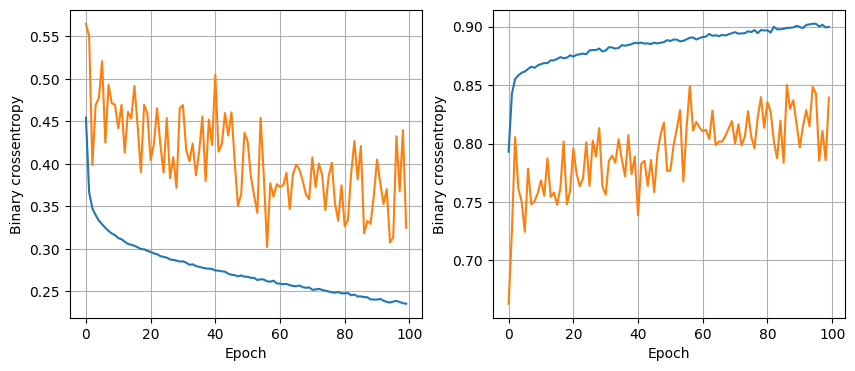

119/119 [==============================] - 1s 6ms/step - loss: 0.3235 - accuracy: 0.8751
64 nodes, dropuout 0, lr 0.001, batch size 128


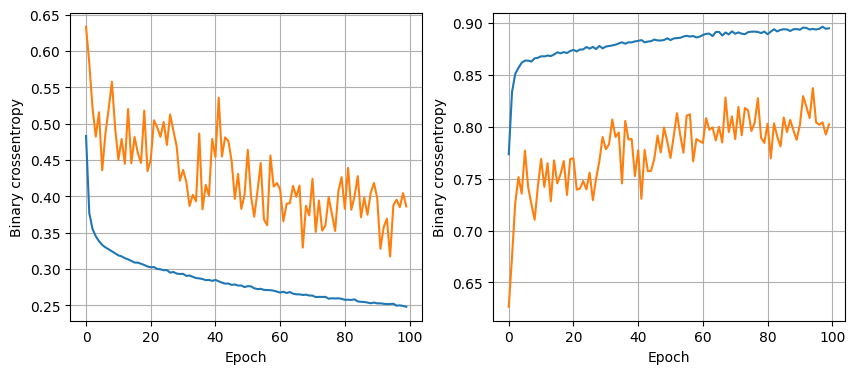

119/119 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8791
64 nodes, dropuout 0.2, lr 0.01, batch size 32


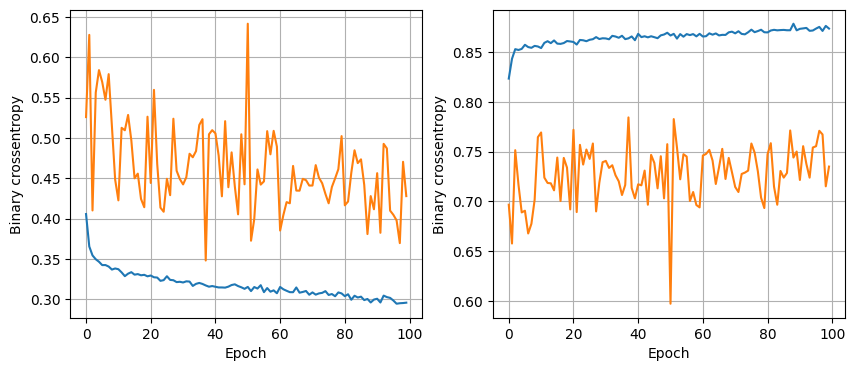

119/119 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8741
64 nodes, dropuout 0.2, lr 0.01, batch size 64


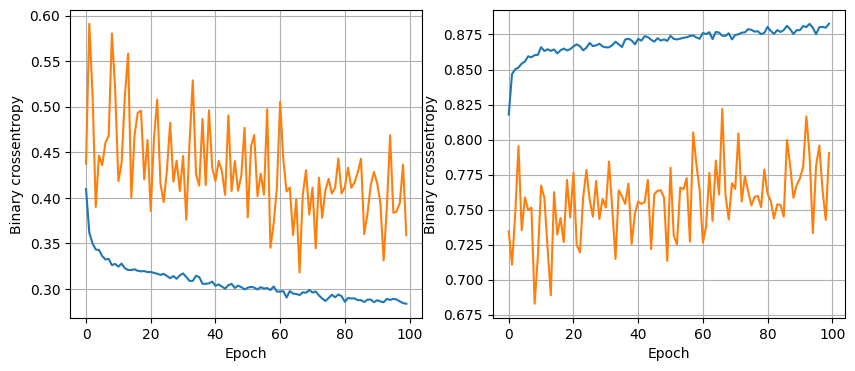

119/119 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8793
64 nodes, dropuout 0.2, lr 0.01, batch size 128


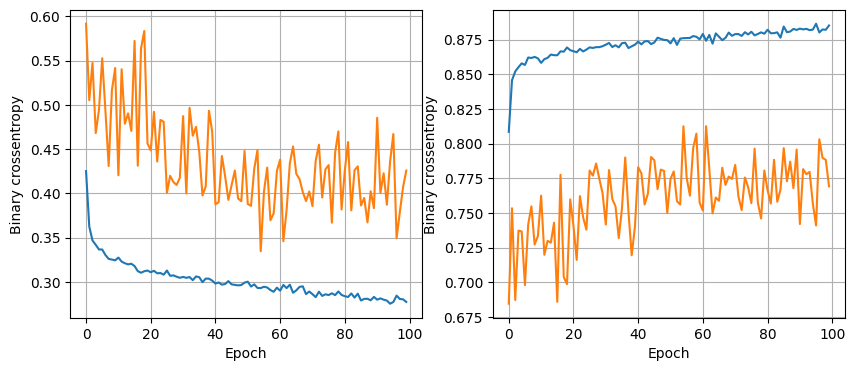

119/119 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8838
64 nodes, dropuout 0.2, lr 0.005, batch size 32


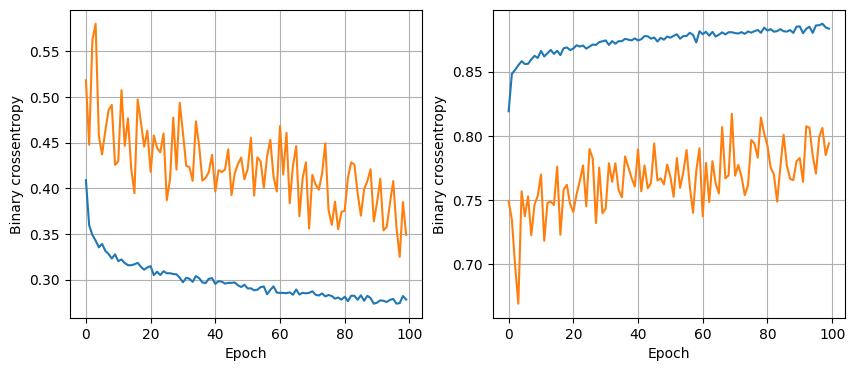

119/119 [==============================] - 1s 5ms/step - loss: 0.2916 - accuracy: 0.8788
64 nodes, dropuout 0.2, lr 0.005, batch size 64


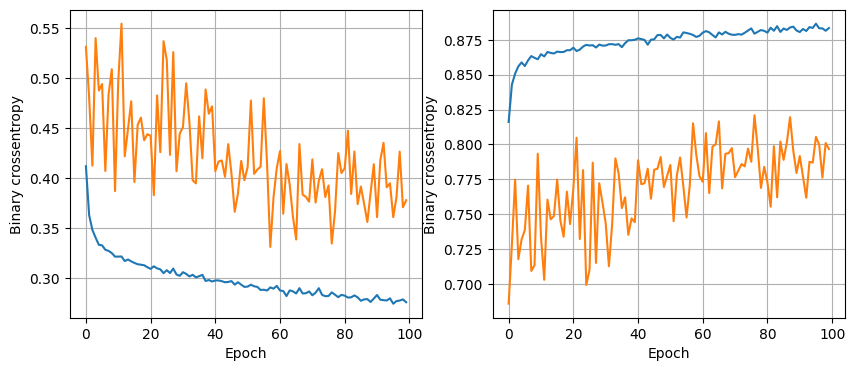

119/119 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8825
64 nodes, dropuout 0.2, lr 0.005, batch size 128


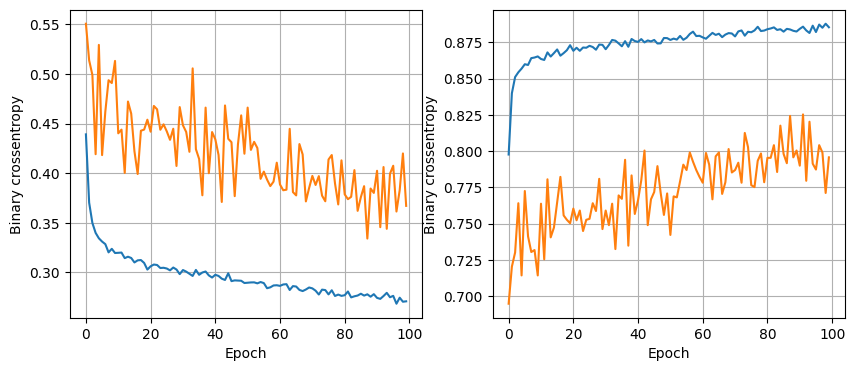

119/119 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8785
64 nodes, dropuout 0.2, lr 0.001, batch size 32


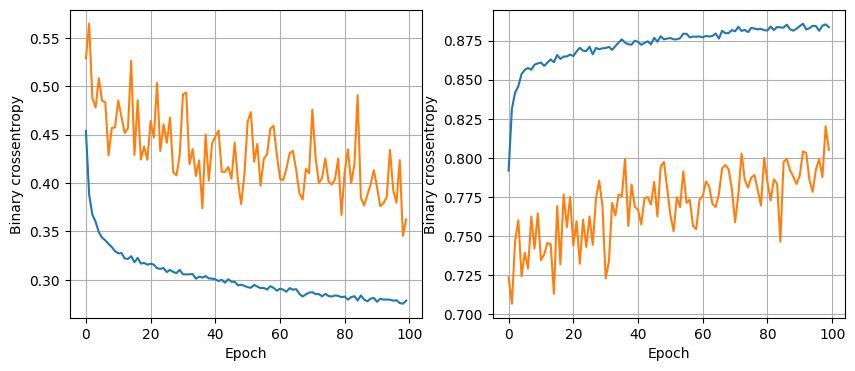

119/119 [==============================] - 1s 4ms/step - loss: 0.2908 - accuracy: 0.8783
64 nodes, dropuout 0.2, lr 0.001, batch size 64


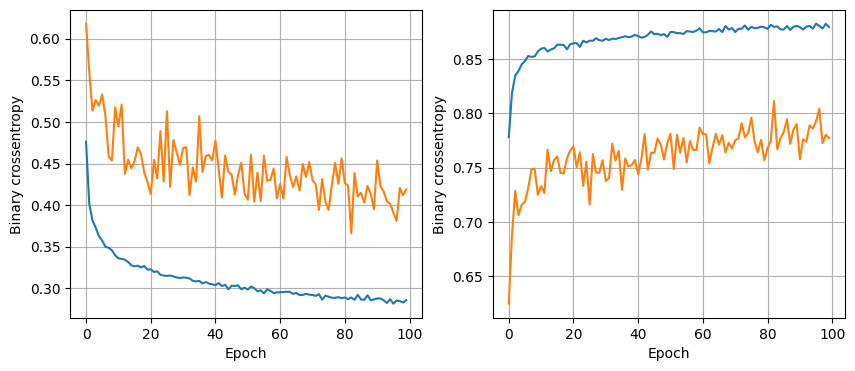

119/119 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8817
64 nodes, dropuout 0.2, lr 0.001, batch size 128


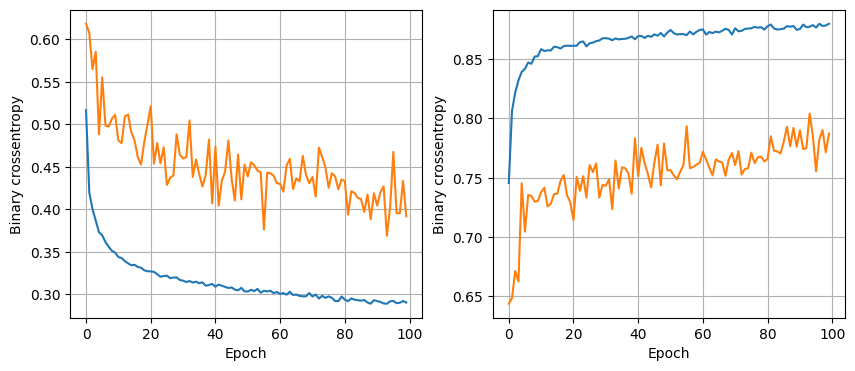

119/119 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8846


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropuout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss  = val_loss
          least_loss_model = model

In [97]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 4ms/step


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1367
           1       0.88      0.93      0.91      2437

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804

